# Clifford Circuit Spectrum

In [1]:
import sys
sys.path.insert(0, '../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from scipy.stats import gaussian_kde
from quantum_circuits import *
from analysis import *
from utils import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [2]:
np.random.seed(43)
random.seed(43)
tf.random.set_seed(43)
n = 3
d = 2**n

model = fit_model(channel=KrausMap(d=d, 
                                    rank=64),
                  spam=SPAM(init = InitialState(d),
                            povm = CorruptionMatrix(d),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                            ),
                  loss_function = ProbabilityMSE(),
                  N_map=500,
                  N_spam=None,
                  num_iter_map=4000,
                  num_iter_spam=4000,
                  filename="belem_3qubit_clifford0",
                 )

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

0.0014117629357292979


  0%|          | 0/4000 [00:00<?, ?it/s]

In [5]:
spectrum = channel_spectrum(model.channel, use_coords=True)

C:\Program Files\Anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


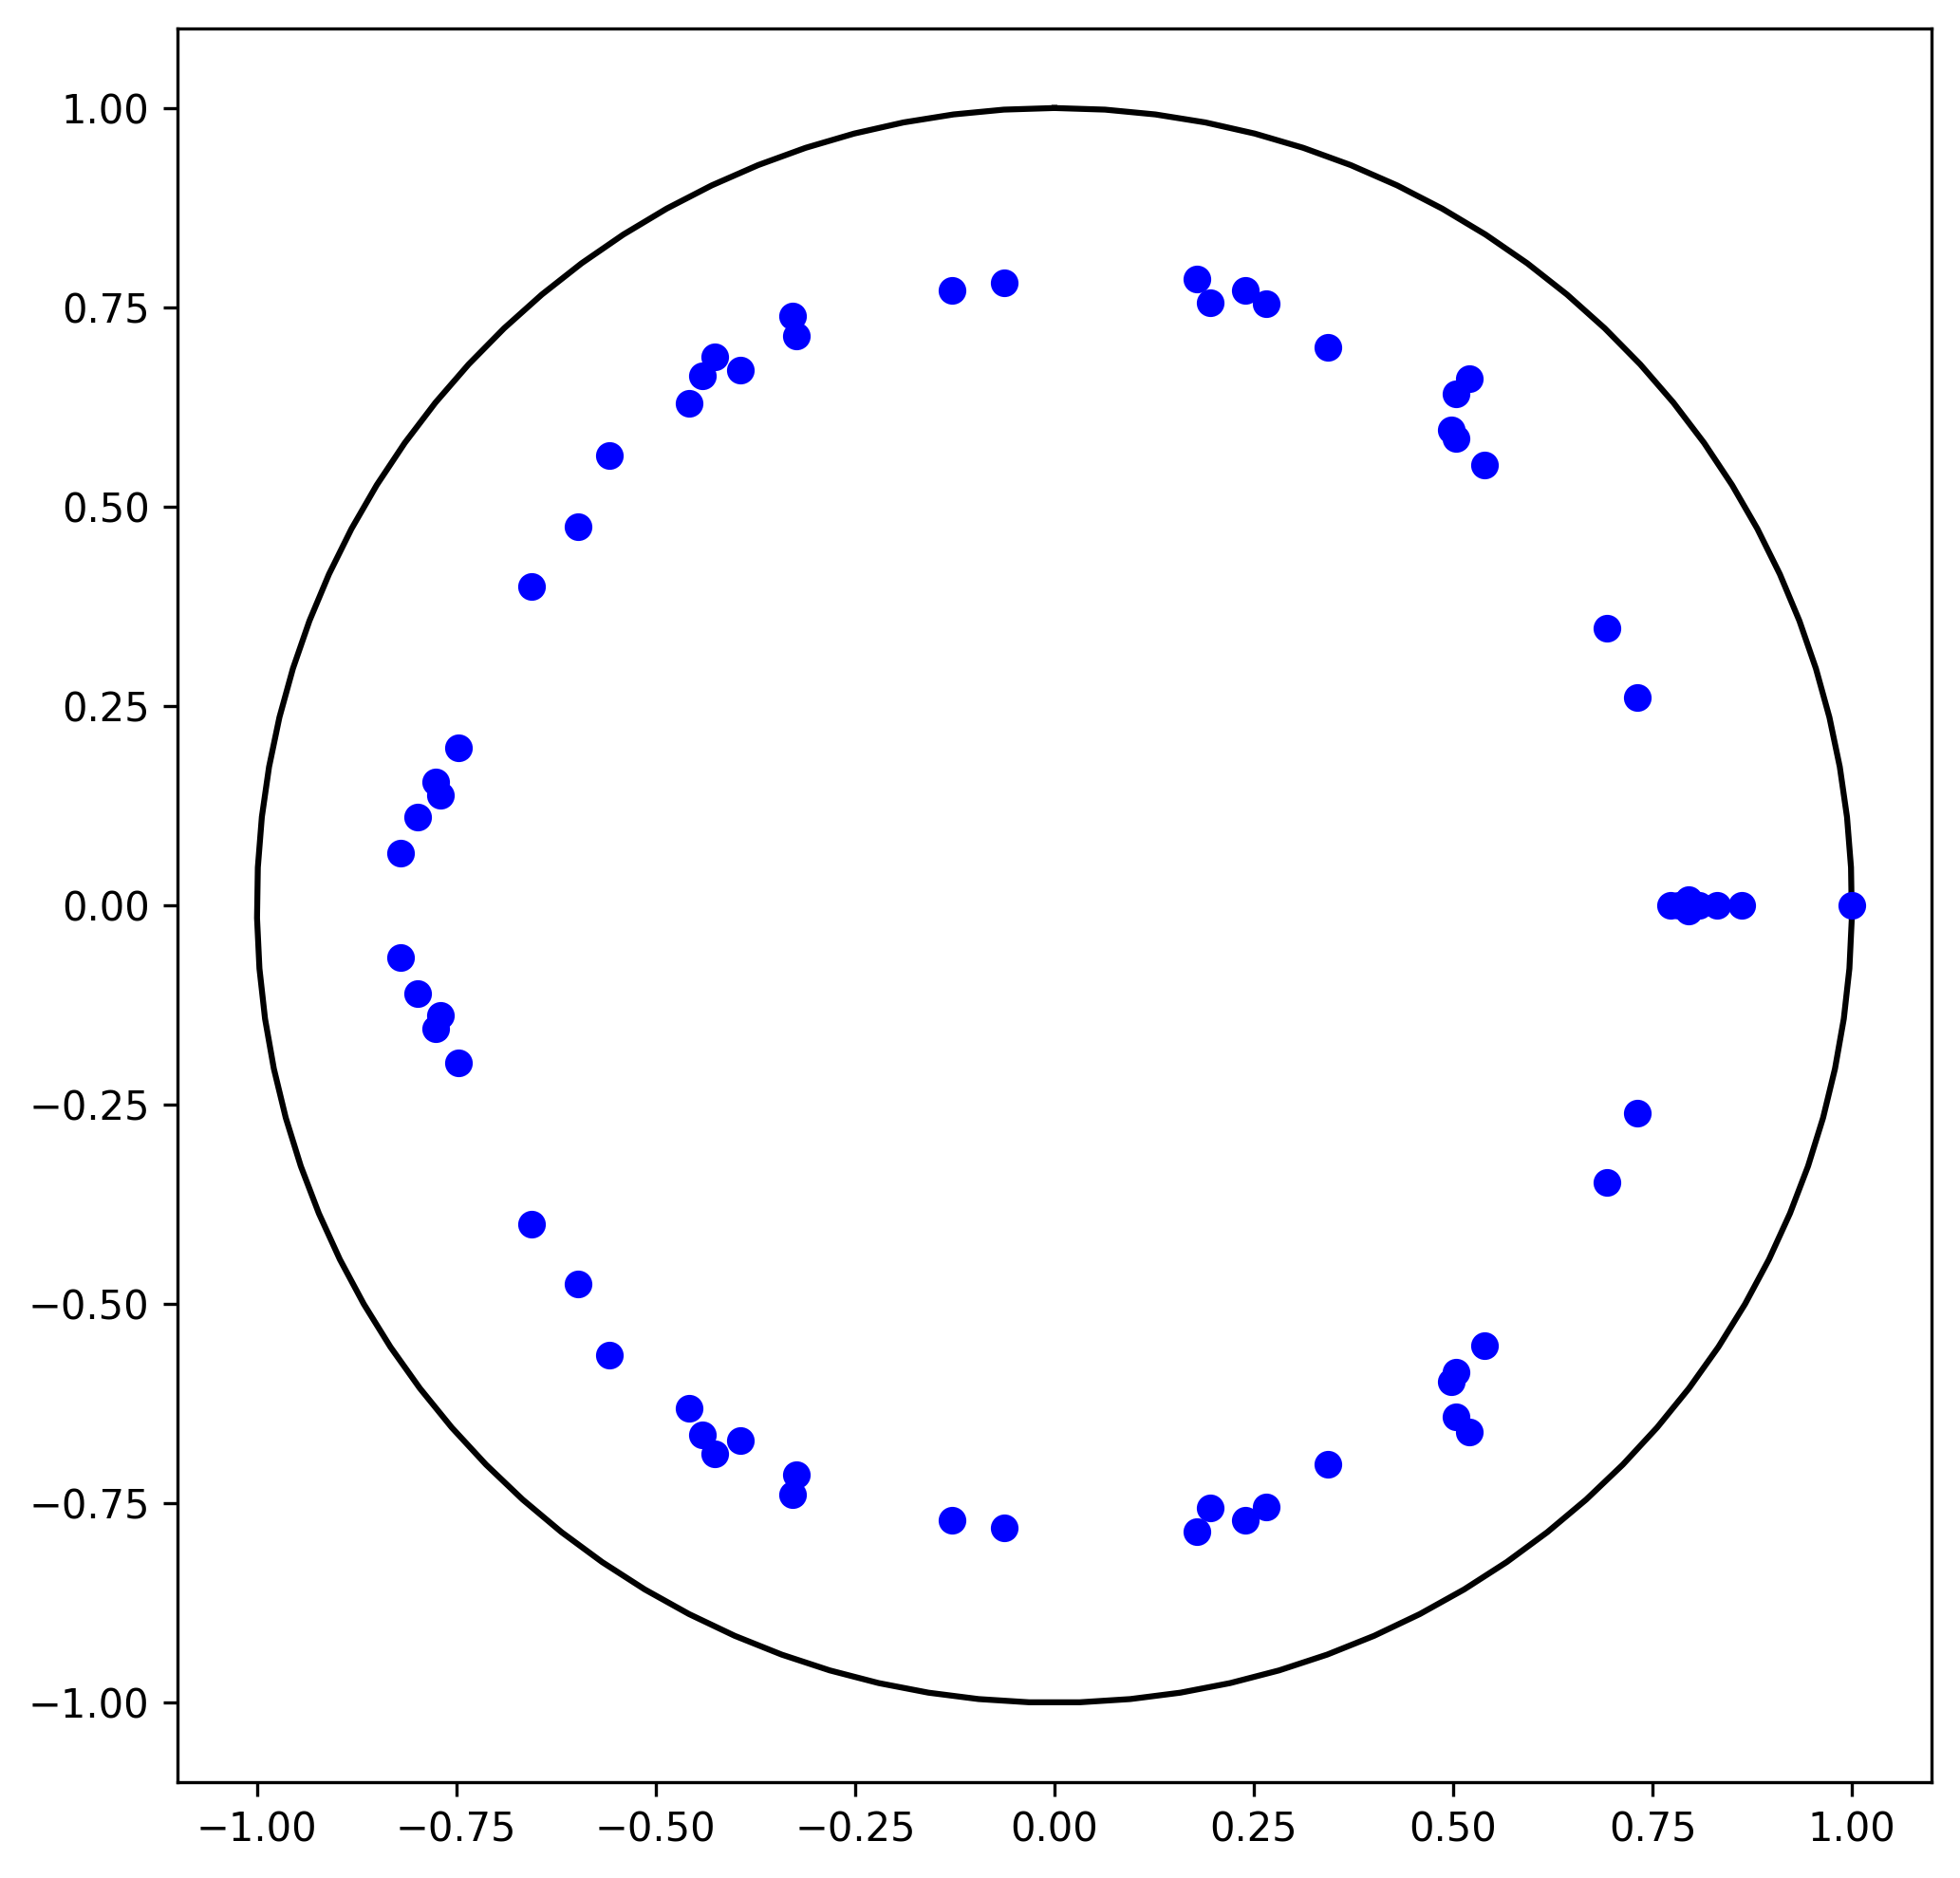

In [7]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum[:,0], spectrum[:,1], "bo")

In [4]:
np.random.seed(43)
random.seed(43)
tf.random.set_seed(43)
n = 4
d = 2**n

model = fit_model(channel=KrausMap(d=d, 
                                    rank=256),
                  spam=SPAM(init = InitialState(d),
                            povm = CorruptionMatrix(d),
                            optimizer = tf.optimizers.Adam(learning_rate=0.01),
                            ),
                  loss_function = ProbabilityMSE(),
                  N_map=500,
                  N_spam=None,
                  num_iter_map=4000,
                  num_iter_spam=4000,
                  filename="manila_4qubit_clifford0",
                 )

  0%|          | 0/300 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

0.0008423532173654842


  0%|          | 0/4000 [00:00<?, ?it/s]

In [5]:
spectrum = channel_spectrum(model.channel, use_coords=True)

C:\Users\krist\anaconda3\envs\env_qiskit\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


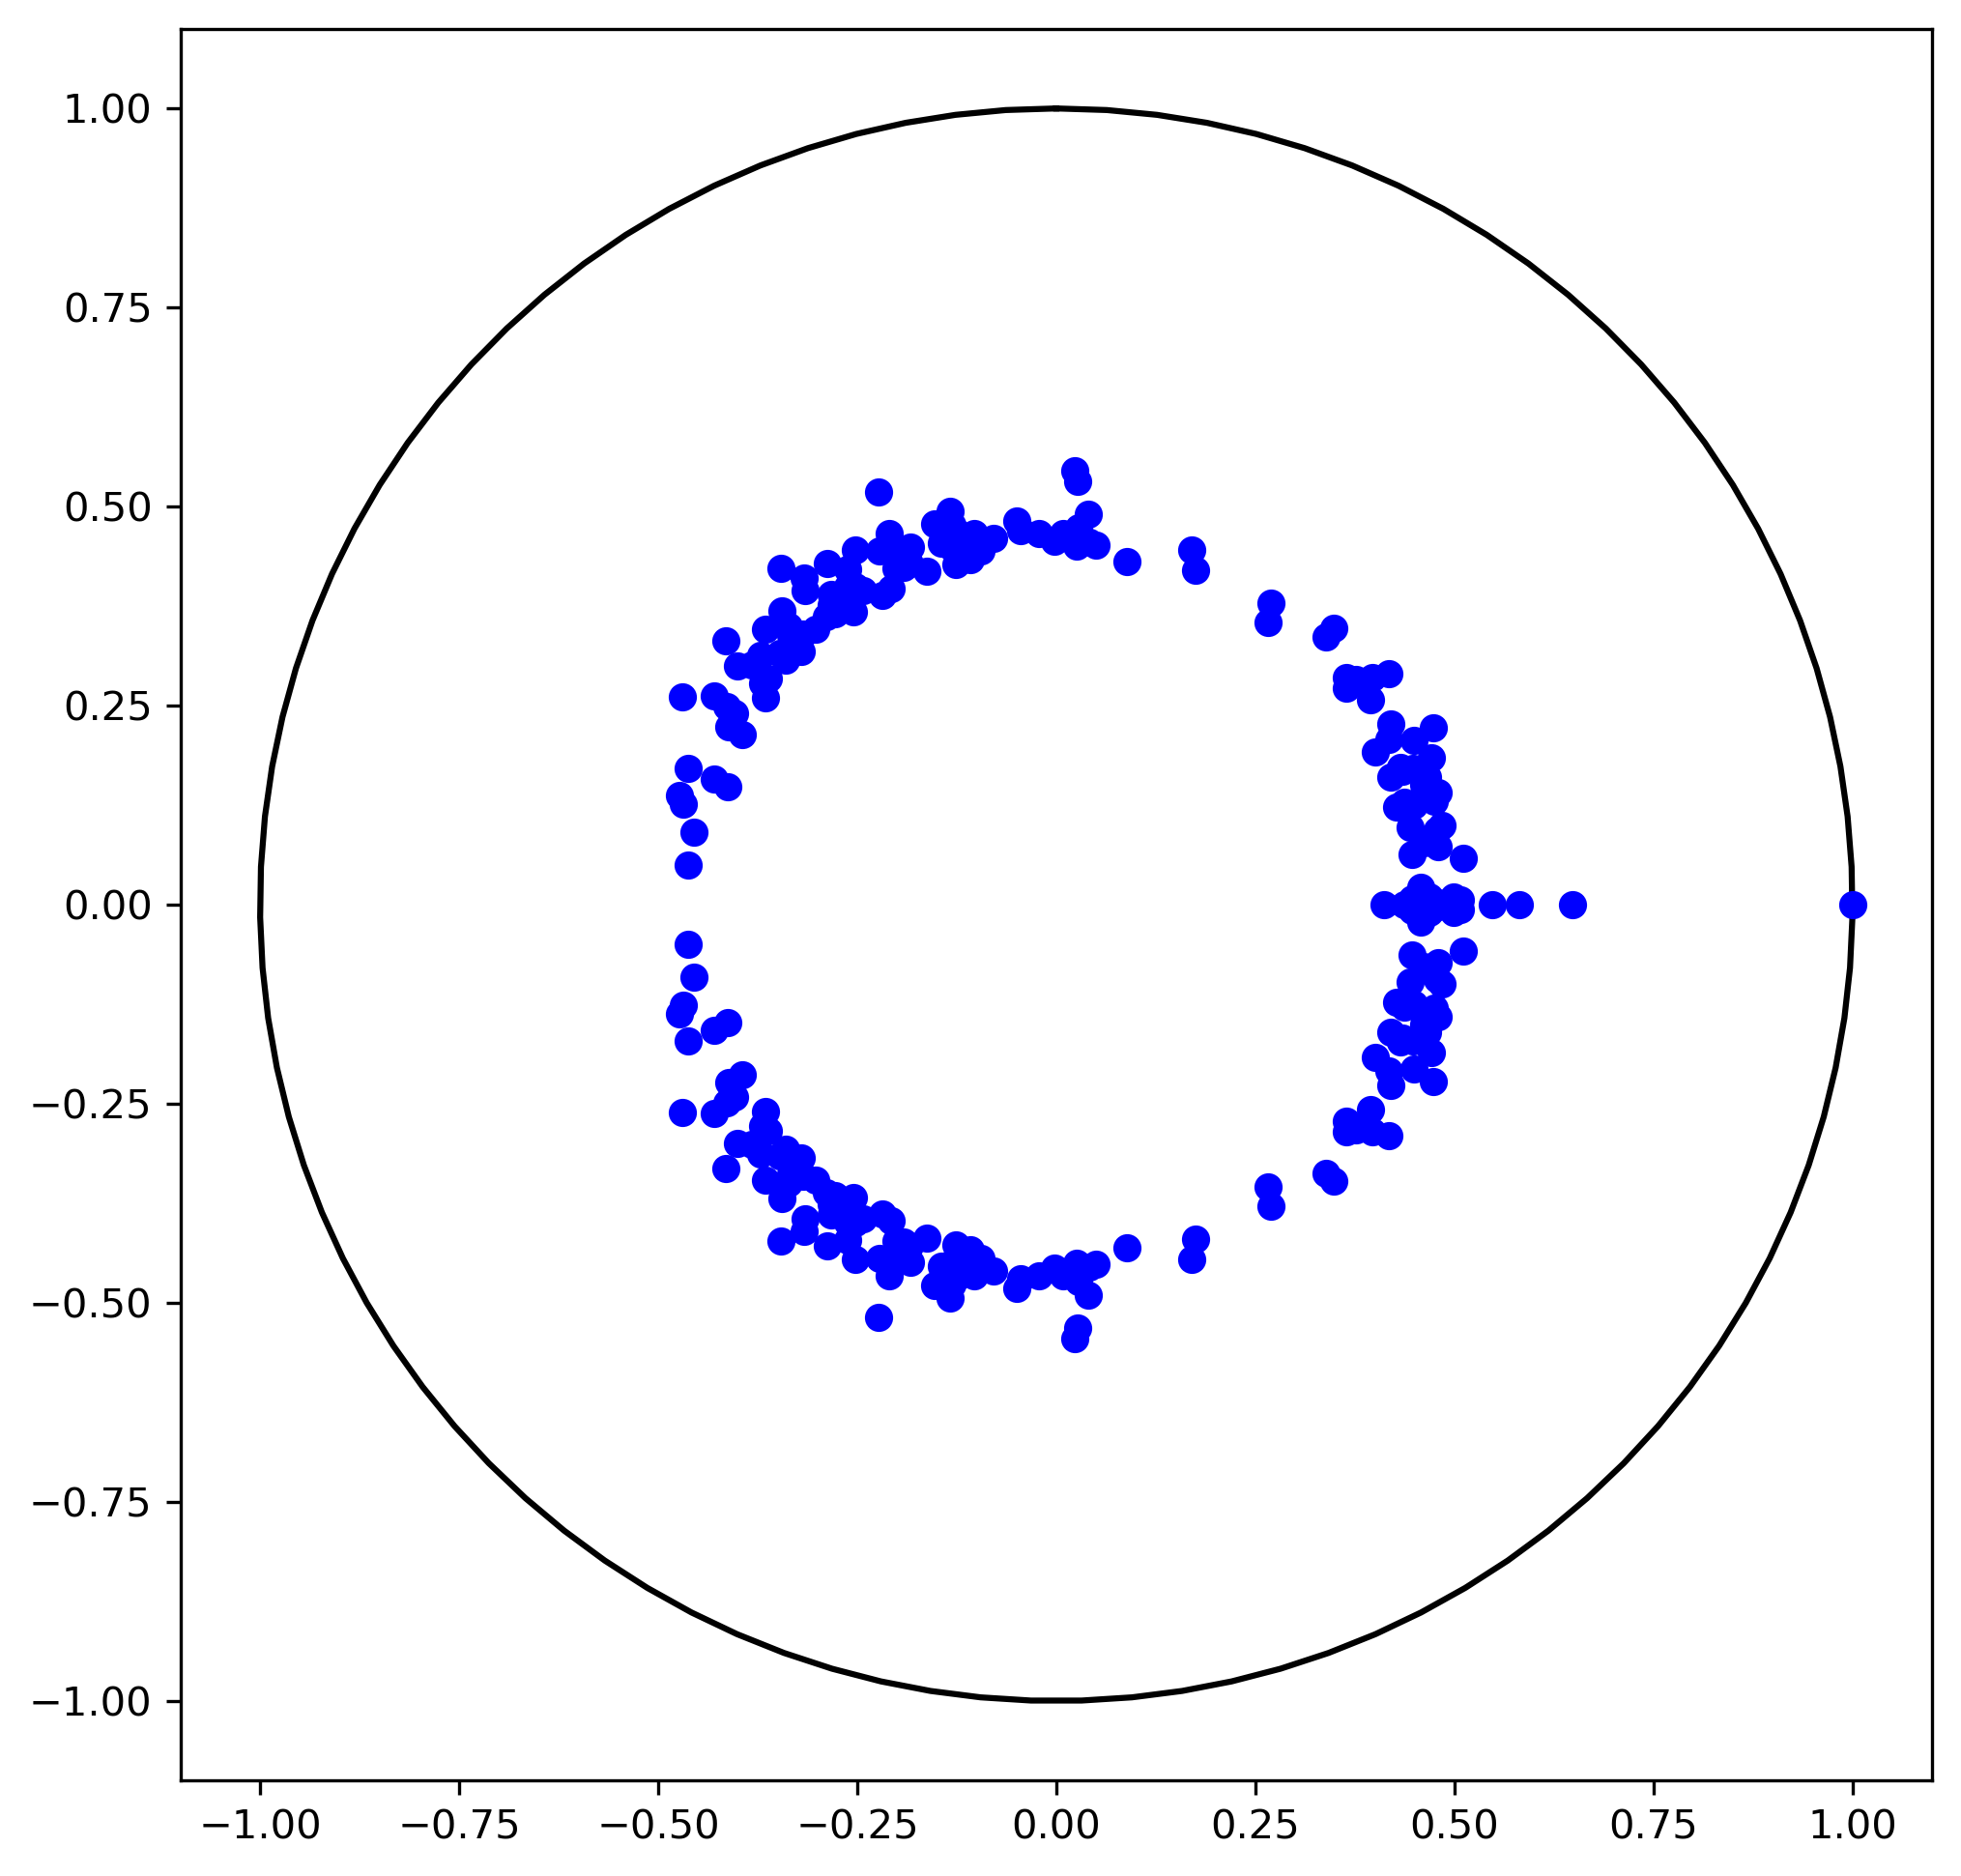

In [6]:
t = np.linspace(0, 2*np.pi, 100)
circle = [np.sin(t), np.cos(t)]

fig = plt.figure(figsize=(8,8), dpi = 300, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
ax.set_aspect(1)
plt.plot(*circle, "k")

plt.plot(spectrum[:,0], spectrum[:,1], "bo")